## Marianne Trujillo Alltamirano
### Exp. 740694
30/03/2023

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np 

def f1(x):
    return np.exp(x)*np.log10(x)

def f2(x):
    return np.sin(x)*np.log(x)

In [2]:
def montecarlo1 (f1, N, a, b):
    u =np.random.uniform(a, b, N)
    return np.mean(f1(u)*(b-a))

def montecarlo2 (f2, N, a, b):
    u =np.random.uniform(a, b, N)
    return np.mean(f2(u)*(b-a)) 

In [3]:
import pandas as pd

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=["Aproximación f1", "Aproximación f2"], index = N)
table

,Aproximación f1,Aproximación f2
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [4]:
a = 1 
b = 3

for i in N :
    aprox1 = montecarlo1 (f1, int(i), a, b)
    table.loc[i, "Aproximación f1"] = aprox1
    
    aprox2 = montecarlo2 (f2, int(i), a, b)
    table.loc[i, "Aproximación f2" ] = aprox2    

table

,Aproximación f1,Aproximación f2
10.0,3.996401,0.951245
100.0,6.510558,0.86561
1000.0,6.051559,0.877927
10000.0,6.106003,0.870558
100000.0,6.077658,0.870741


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [5]:
import numpy as np
import sympy as sp

def f(x,y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

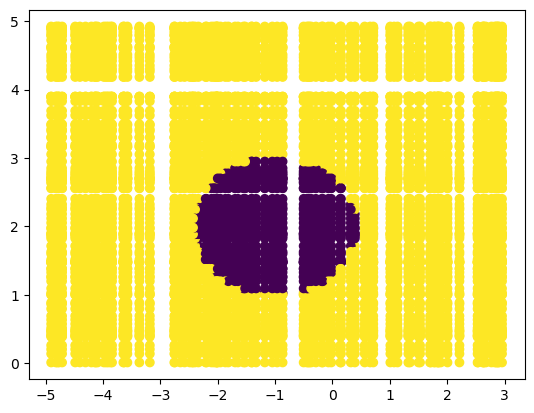

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-5, 3, 100)
y = np.random.uniform(0, 5, 100)

X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c =~f(X,Y))

In [7]:
def montecarlo (reg, ax, bx, ay, by, N):
    x = np.random.uniform( ax, bx ,N)
    y = np.random.uniform( ay, by ,N)
    B = reg(x,y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B) * AR

In [8]:
montecarlo(f, -5, 3, 0, 5, 1000)

4.4

In [13]:
import pandas as pd

N = np.logspace(1, 5, 5)
tabla2 = pd.DataFrame(columns=["Aproximación", "Error relativo"], index = N)
tabla2

,Aproximación,Error relativo
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [31]:
for i in N : 
    aprox = montecarlo(f, -5, 3, 0, 5, 1000)
    C_rel = np.sqrt( (1 - (int(i)/54)) / ((int(i)/54)) )
    error_relativo = (np.log10(C_rel)) - ((1/2)*np.log10(1000))
    table2.loc[i,"Aproximación"] =  aprox
    table2.loc[i, "Error relativo"] = error_relativo
table2

C:\Users\kamil\AppData\Local\Temp\ipykernel_30988\575988831.py:3: RuntimeWarning: invalid value encountered in sqrt
  C_rel = np.sqrt( (1 - (int(i)/54)) / ((int(i)/54)) )


,Aproximación,Error relativo
10.0,3.88,-1.178274
100.0,4.0,NaN
1000.0,4.6,NaN
10000.0,4.08,NaN
100000.0,4.88,NaN


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### **Caso 1**
Para calcular el valor de las empresas a través de los registros históricos de sus utilidades, proyectando así el futuro de las mismas.

### **Caso 2**
Para evaluar las inversiones en proyectos en una unidad de negocio o nivel corporativo al conocer hasta dónde puede caer nuestra inversión inicial; así 
como, saber la racha de operaciones positivas y negativas consecutivas que se 
pueden esperar.

### **Caso 3**
Para evaluar los derivados financieros a través de rango de resultados esperados representado por una lista de operaciones 
históricas.

### Referencias

Repositorio Digital IPN: Identificador inválido. (s. f.). https://repositoriodigital.ipn.mx/bitstream/123456789/5944/1/GONZALEZ+JUAREZ+KARLA+Tesis+2008.pdf